# 1 Introduction

## 1.1 Paintshop

### 1.1.1 Current status

* types of reports/datasets available
 * Weekly – every Sunday
 * On demand – every time you need data
* requested months
 * less faulty month
   * August 2019 - there were only 5 faults for Av. General Pendular according to thetab Diario_Binarias_Sum(006.TTS_T4_Diario_Averías.xlsx)
 * most faulty month
   * August 2018 - all pendulars had faults except Av. Pendular Motriz 4(no faults in the sheet) according to the tab Diario_Binarias_Sum(006.TTS_T4_Diario_Averías.xlsx)

### 1.1.2 Used data in this report

* Fireman_OnDemand_v1.4_082019.zip sent on 15/12/2020 by Elma Sanz(elma.sanz@seat.es)

### 1.1.3 Opened issues

* missing 4 features in 2018 ['CONTADOR CARROCERIAS SALIDA PENDULAR TTS','NUMERO PENDULAR EN FALLO', 'VALOR TENSORA LADO DERECHO', 'VALOR TENSORA LADO IZQUIERDO']
* inclination measuremnts not available: 
 1. provide the text messageges from the system + values above threshold that are stored
 2. lower the threshold for measurement storing
 3. install new or different sensors
* explanation of BiDrac global features

## 1.2 Spindle

### 1.2.1 Current status

* contact person/company - Manuel Suárez, Tyris (through Raul Palacios Trujillo, Seat)
* types of datasets with TimeStamp intervals
 * Transientdata 0.5s
 * Rawdata 10s
* number of features in final datasets
 * Transientdata - as Transientdata 39
 * Rawdata - as Rawdata 344
* description of the features(TagIDs) was provided by Manuel Suarez [TagId_Description.xlsx](https://lut.sharepoint.com/:x:/r/sites/o365fireman/Shared%20Documents/General/Use_Cases/Datasets/Spindle/TagId_Description.xlsx?d=w480b2b2063434ee6bf0f23dca865f50c&csf=1&web=1&e=Mi6cmQ)

### 1.2.2 Used data in this report

* most recent and smallest in size spindle dataset available on LUT sharepoint [wetransfer-8f07cc.zip](https://lut.sharepoint.com/:u:/r/sites/o365fireman/Shared%20Documents/General/Use_Cases/Datasets/Spindle/backup/wetransfer-8f07cc.zip?csf=1&web=1&e=rBjGSV)

### 1.2.3 Opened issues

* Rawdata 344, Transientdata 39 is not available yet (waiting for Tyris)
* [ONHOLD] no faults were yet detected
* [TENTATIVELY CLOSED] merge of multiple sql tables storing the data - not possible due to type of integration should be handled in post-processing by Tyris in future according to Manuel Suárez
* [TENTATIVELY CLOSED]adjust the sql tables so the data is stored in columns, ie. 1 column per feature, and assign NA in case the values are currently not available - not possible due to type of integration, but this should be handled in post-processing by Tyris in future according to Manuel Suárez 

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
pd.options.display.max_rows = 4000

# 2 Analysis

## 2.1 Paintshop

### 2.1.1 Features 

 1. read Values.csv
 2. create datetime type column
 3. clean dataframe
 4. set index frequency to 60s to find missing values
 5. provide initial description of the feature columns

In [96]:
dir_loc = '#datasets/paintshop/Fireman_OnDemand_v1.4_082019/'
Values_loc = dir_loc + 'Values.csv'
WarningsFaults_loc = dir_loc + 'WarningsFaults.csv'

values_df = pd.read_csv(Values_loc)
values_df['TS'] = pd.to_datetime(values_df['Fecha'] + ' ' + values_df['Hora Completa 24'], format="%d/%m/%y %H:%M:%S")
values_df.drop(columns=['Fecha', 'Hora Completa 24', 'Descripción Proceso - Señal BiDrac', 'Valor - Global'], inplace=True )

values_df = values_df.pivot(index='TS', columns='Descripción Proceso - Señal PMC', values='Value')
values_df = values_df.asfreq('60s')

/home/palo/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [97]:
values_desc = values_df.describe()
values_desc.loc['NA[%]'] = values_df.isnull().sum()/len(values_df)
values_desc

Descripción Proceso - Señal PMC,CARGA PENDULAR UNIDADES,CONTADOR KW/H,CONTADOR CARROCERIAS SALIDA PENDULAR TTS,E-P01 CONSUMO ELECTRICO (KW/H),EFICIENCIA Y DIA,ENTRADA CORTADA /PROCESO,FALTA CARROCERIA ENTRADA,NUMERO CARROCERIAS PRODUCIDAS,NUMERO PENDULAR EN FALLO,POR PARO TRANSPORTE,SUMA DE PAUSAS,TOTAL ASUMIDOS,VALOR TENSORA LADO DERECHO,VALOR TENSORA LADO IZQUIERDO,VELOCIDAD PENDULAR M/MIN
count,33542.000000,33617.000000,33541.000000,33557.000000,33542.000000,33542.000000,33542.000000,33542.000000,33541.000000,33542.000000,33542.000000,33542.000000,33541.000000,33541.000000,33542.000000
mean,16.891450,31.570634,1.190185,132.695773,521.225747,9.290203,122.702164,290.771331,0.035300,52.308091,0.000000,122.702164,420.930980,430.783459,0.000000
std,11.620719,25.664578,1.141323,234.978251,254.035586,24.261606,83.939681,174.341474,1.771892,127.413034,0.000000,83.939681,3.537655,5.133577,0.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,411.000000,418.000000,0.000000
25%,6.000000,10.000000,0.000000,2.280000,452.000000,0.000000,37.000000,147.000000,0.000000,1.000000,0.000000,37.000000,418.000000,427.000000,0.000000
50%,18.000000,30.000000,1.000000,3.600000,547.000000,0.000000,140.000000,340.000000,0.000000,4.000000,0.000000,140.000000,421.000000,431.000000,0.000000
75%,25.750000,50.000000,2.000000,170.000000,641.000000,5.000000,200.000000,380.000000,0.000000,11.000000,0.000000,200.000000,424.000000,433.000000,0.000000
max,34.000000,100.000000,5.000000,990.000000,997.000000,125.000000,348.000000,601.000000,126.000000,480.000000,0.000000,348.000000,464.000000,452.000000,0.000000
NA[%],0.248611,0.246931,0.248634,0.248275,0.248611,0.248611,0.248611,0.248611,0.248634,0.248611,0.248611,0.248611,0.248634,0.248634,0.248611


### 2.1.2 Labels

 1. read dataset to pandas dataframe
 2. check fraction of NA values and drop the NA rows
 3. create datetime type column of start/end of faults with rounded time to 1 minute intervals
 4. check types of faults
 5. go through all faults and assign 1 to label column in each row where the fault was active
 6. show and save final dataset

In [108]:
WarningsFaults_df = pd.read_csv(WarningsFaults_loc)
WarningsFaults_df.isnull().sum()/len(WarningsFaults_df)

Id Proceso - Aviso                 0.000000
Descripción Proceso - Aviso PMC    0.000000
Clasificación BiDrac-Aviso         0.000000
Clasificación Proceso - Aviso      0.000000
Fecha Inicio - Fecha Llegada       0.000000
Hora Inicio - Hora Llegada         0.000000
Fecha Fin - Fecha Salida           0.101512
Hora fin - Hora Salida             0.000000
Duración Neto - Avisos             0.000000
dtype: float64

In [110]:
WarningsFaults_df.dropna(inplace=True)
# time is rounded to minutes for easier merging with Values
WarningsFaults_df['TS Inicio'] = pd.to_datetime(WarningsFaults_df['Fecha Inicio - Fecha Llegada'] + ' ' + WarningsFaults_df['Hora Inicio - Hora Llegada'], format="%d/%m/%y %H:%M:%S").round('min')
WarningsFaults_df['TS Fin'] = pd.to_datetime(WarningsFaults_df['Fecha Fin - Fecha Salida'] + ' ' + WarningsFaults_df['Hora fin - Hora Salida'], format="%d/%m/%y %H:%M:%S").round('min')
WarningsFaults_df.drop(columns=['Fecha Inicio - Fecha Llegada', 'Hora Inicio - Hora Llegada', 'Fecha Fin - Fecha Salida', 'Hora fin - Hora Salida', 'Duración Neto - Avisos'], inplace=True )

In [111]:
WarningsFaults_df.nunique()

Id Proceso - Aviso                   7
Descripción Proceso - Aviso PMC      7
Clasificación BiDrac-Aviso           4
Clasificación Proceso - Aviso        2
TS Inicio                          231
TS Fin                             259
dtype: int64

In [112]:
WarningsFaults_df['Descripción Proceso - Aviso PMC'].unique()

array(['ENTRADA CORTADA', 'TTS NO PRODUCE  PRODUCCION',
       'PENDULAR 11.3.2.0 AVERIA GENERAL',
       'DEFECTO INCLINACION  ZONA CAJA 4',
       'DEFECTO INCLINACION  ZONA CAJA 8',
       'DEFECTO INCLINACION PENDULOS TTS',
       'DEFECTO INCLINACION  ZONA CAJA 7'], dtype=object)

In [114]:
values_df[WarningsFaults_df['Descripción Proceso - Aviso PMC'].unique()] = 0
for i in range(len(WarningsFaults_df)):
    start = WarningsFaults_df.iloc[i]['TS Inicio']
    end = WarningsFaults_df.iloc[i]['TS Fin']
    col_name = WarningsFaults_df.iloc[i]['Descripción Proceso - Aviso PMC']
    values_df.loc[start:end, col_name] = 1

In [115]:
values_df.to_csv(dir_loc + 'dataset.csv')
values_df.head()

Descripción Proceso - Señal PMC,CARGA PENDULAR UNIDADES,CONTADOR KW/H,CONTADOR CARROCERIAS SALIDA PENDULAR TTS,E-P01 CONSUMO ELECTRICO (KW/H),EFICIENCIA Y DIA,ENTRADA CORTADA /PROCESO,FALTA CARROCERIA ENTRADA,NUMERO CARROCERIAS PRODUCIDAS,NUMERO PENDULAR EN FALLO,POR PARO TRANSPORTE,SUMA DE PAUSAS,TOTAL ASUMIDOS,VALOR TENSORA LADO DERECHO,VALOR TENSORA LADO IZQUIERDO,VELOCIDAD PENDULAR M/MIN,ENTRADA CORTADA,TTS NO PRODUCE PRODUCCION,PENDULAR 11.3.2.0 AVERIA GENERAL,DEFECTO INCLINACION ZONA CAJA 4,DEFECTO INCLINACION ZONA CAJA 8,DEFECTO INCLINACION PENDULOS TTS,DEFECTO INCLINACION ZONA CAJA 7
TS,,,,,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,18.0,20.0,3.0,1.20,532.0,5.0,56.0,98.0,0.0,0.0,0.0,56.0,416.0,428.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-01 00:01:00,18.0,20.0,3.0,1.20,537.0,5.0,56.0,100.0,0.0,0.0,0.0,56.0,418.0,429.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-01 00:02:00,18.0,20.0,2.0,1.21,552.0,5.0,56.0,101.0,0.0,0.0,0.0,56.0,417.0,430.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-01 00:03:00,20.0,20.0,1.0,1.22,543.0,5.0,56.0,102.0,0.0,0.0,0.0,56.0,415.0,430.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-01 00:04:00,20.0,20.0,0.0,1.23,548.0,5.0,56.0,103.0,0.0,0.0,0.0,56.0,415.0,428.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.1.3 Graphs

 1. timeseries plot of each feature and label
 2. sorted features by variance - in general, higher variance means higher probability that the feature will be usefull for classification
 3. correlation heatmap - cross correlation between all features
 4. summary of label data - we need more faults (request more data) so the classification would make sense

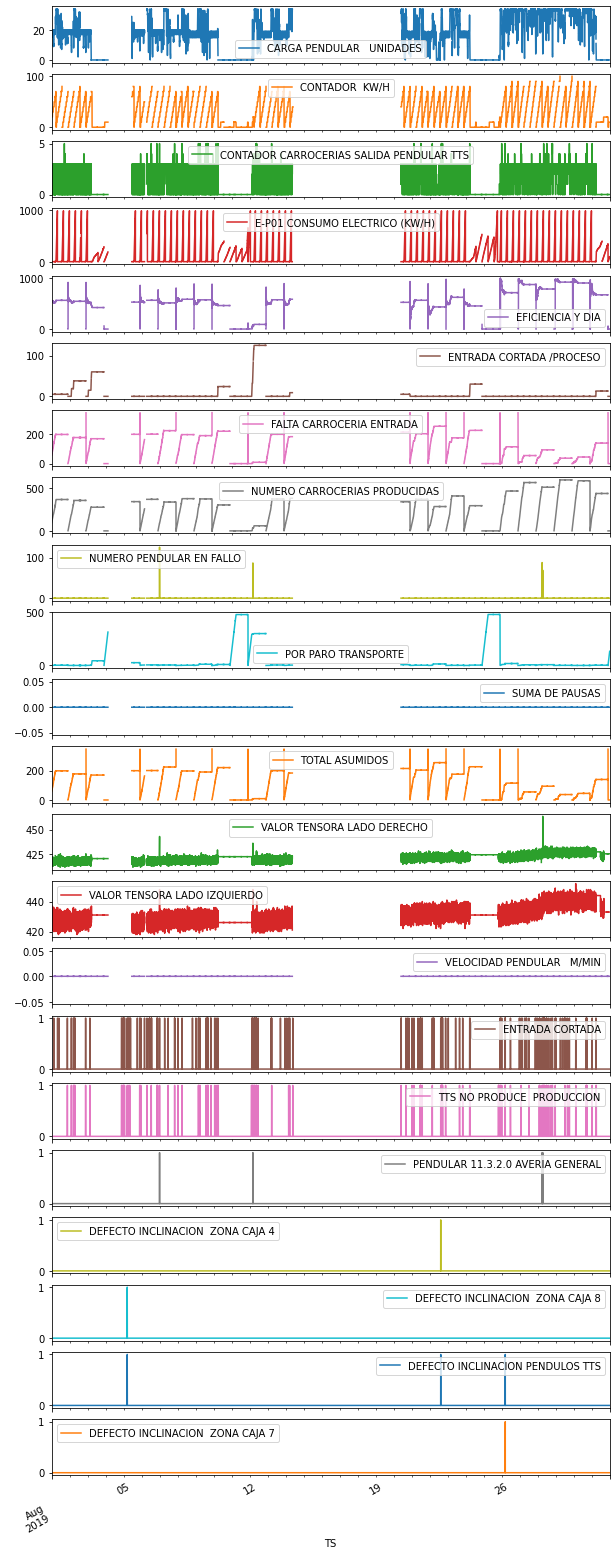

In [116]:
values_df.plot(subplots=True, figsize=(10,30));

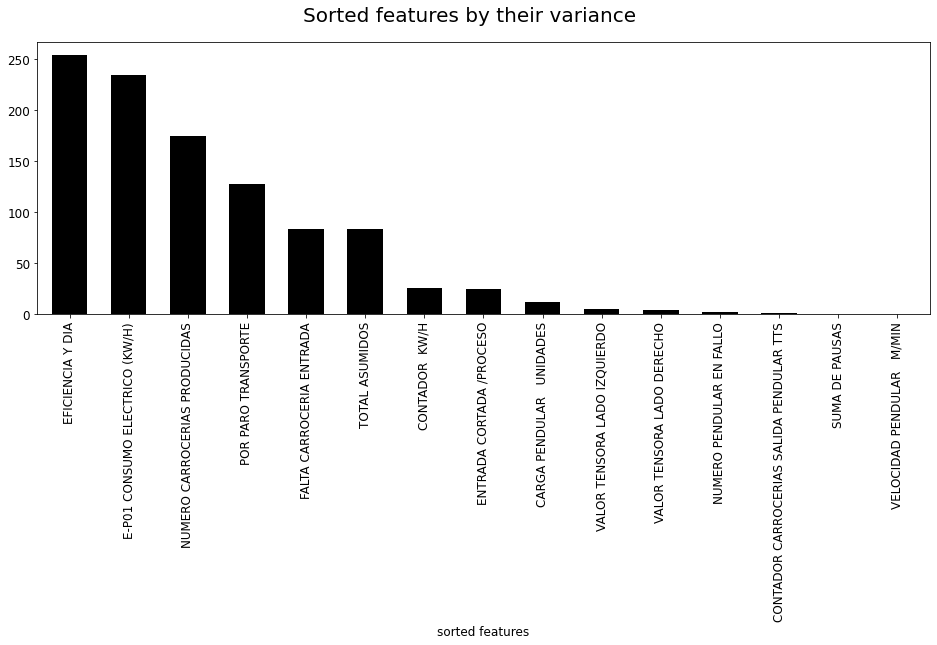

In [127]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))
fig.suptitle('Sorted features by their variance', size=20)

features = values_df.loc[:, ~values_df.columns.isin(WarningsFaults_df['Descripción Proceso - Aviso PMC'].unique())]
features_std = features.std().to_frame().rename(columns = {'index': 'feature', 0: 'std'})
features_std = features_std.sort_values('std', ascending = False)

bar_plot = features_std.plot.bar(ax=ax, legend=False, color ='black', width=0.6)
ax.tick_params(labelsize=12)
ax.set_xlabel('sorted features',size=12);

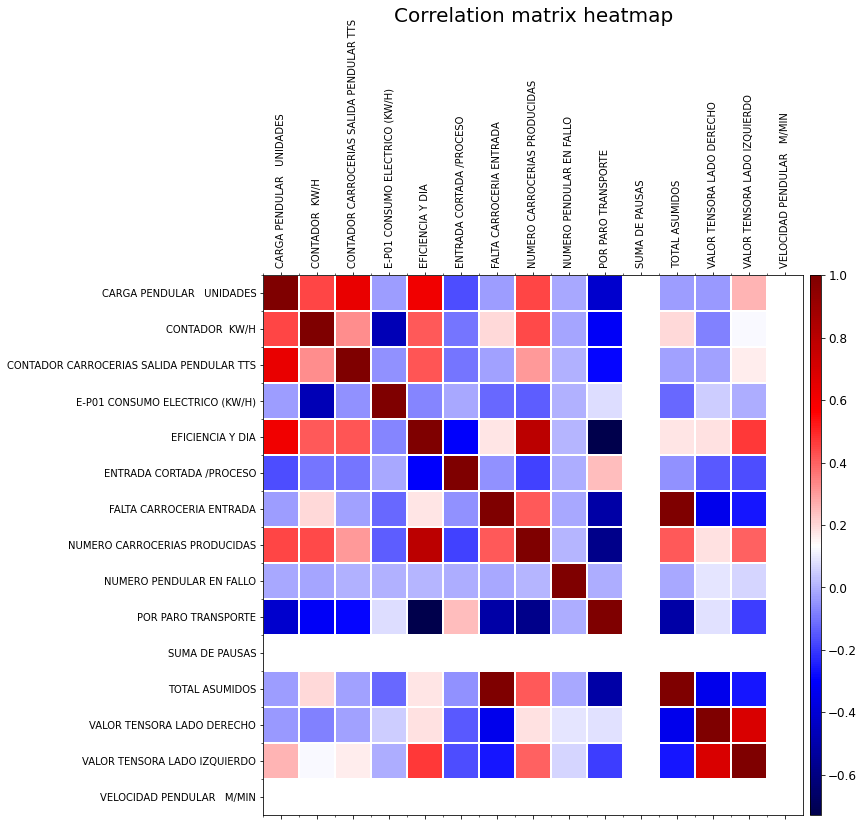

In [139]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig.suptitle('Correlation matrix heatmap', size=20, y=1.25)

features_corr = features.corr()

heatmap = ax.matshow(features_corr, cmap=plt.cm.seismic)
ax.set_xticks(range(features_corr.shape[1]))
ax.set_xticklabels(features_corr.columns.values, fontsize=10, rotation=90)
ax.set_yticks(range(features_corr.shape[0]))
ax.set_yticklabels(features_corr.index.values, fontsize=10)

ax.set_xticks(np.arange(-.5, features_corr.shape[1]-1, 1), minor=True);
ax.set_yticks(np.arange(-.5, features_corr.shape[0]-1, 1), minor=True);
ax.grid(which='minor', color='w', linestyle='-', linewidth=2.)
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cb = fig.colorbar(heatmap, cax=cax)
cb.ax.tick_params(labelsize=12)

In [154]:
labels = values_df.loc[:, values_df.columns.isin(WarningsFaults_df['Descripción Proceso - Aviso PMC'].unique())]
print('Fraction of samples that has more than 1 label:\n' + str(len([x for x in labels.sum(axis=1) if x > 0])/len(labels)))

Fraction of samples that has more than 1 label:
0.022087813620071686


In [166]:
print('Fraction of normal measurements :\n' + str(len([x for x in labels.sum(axis=1) if x == 0])/len(labels)) +
      '\n\nFraction of measurements assigned to each label:\n' + str(labels.sum()/len(labels)))

Fraction of normal measurements :
0.9779121863799283

Fraction of measurements assigned to each label:
Descripción Proceso - Señal PMC
ENTRADA CORTADA                     0.018884
TTS NO PRODUCE  PRODUCCION          0.016622
PENDULAR 11.3.2.0 AVERIA GENERAL    0.000448
DEFECTO INCLINACION  ZONA CAJA 4    0.000112
DEFECTO INCLINACION  ZONA CAJA 8    0.000246
DEFECTO INCLINACION PENDULOS TTS    0.000470
DEFECTO INCLINACION  ZONA CAJA 7    0.000112
dtype: float64


## 2.2 Spindle

 1. run simple bash script that cleans the provided sql dumps and outputs .csv file
 2. read the files to pandas dataframes
 3. create datetime columns and set the appropriate frequency to find out amount of missing data
 4. show initial dataset statistics with added fraction of NA data

In [52]:
%%bash
./spindle_dataset_cleaning.sh \#datasets/spindle/transientEnero.sql
./spindle_dataset_cleaning.sh \#datasets/spindle/rawdatadiciembre2019Enero2020.sql

done
done


In [64]:
dir_loc = '#datasets/spindle/'
transient_data_loc = 'transientEnero.csv'
raw_data_loc = 'rawdatadiciembre2019Enero2020.csv'

transient_df = pd.read_csv(dir_loc + transient_data_loc)
transient_df['TS'] = pd.to_datetime(transient_df['TS'])
transient_df.drop(columns=['DriverId'], inplace=True )
transient_df = transient_df.pivot(index='TS', columns='TagId', values='Value')
transient_df = transient_df.asfreq('500ms')

raw_df = pd.read_csv(dir_loc + raw_data_loc)
raw_df['TS'] = pd.to_datetime(raw_df['TS'])
raw_df.drop(columns=['DriverId'], inplace = True)
raw_df = raw_df.pivot(index='TS', columns='TagId', values='Value')
raw_df = raw_df.asfreq('10s')

In [90]:
transient_desc = transient_df.describe()
transient_desc.loc['NA[%]'] = transient_df.isnull().sum()/len(transient_df)

In [91]:
transient_desc

TagId,32,34,141,142,143,144,145,148,149,150,161,162,163,164,165,168,169,170,172
count,432282.000000,432282.000000,432285.000000,432279.000000,432284.000000,432286.000000,432286.000000,432277.000000,432280.000000,432279.000000,432286.000000,432283.000000,432284.000000,432286.000000,432286.000000,432286.000000,432285.000000,432283.000000,432286.000000
mean,25.897840,13.023716,0.000476,0.644662,0.003985,-0.000654,0.000000,-0.043002,0.031707,0.118441,0.002180,295.464447,0.907546,2.588104,0.000000,6.286893,0.355521,6.014409,-1055.447342
std,67.697704,48.703252,0.029142,1.513568,0.084584,0.309192,0.000000,0.484449,0.203790,0.273886,0.730687,677.620427,12.299569,81.868908,0.000000,71.884351,26.799863,63.556399,2038.643775
min,0.000000,0.000000,-0.029687,-25.231930,-1.752502,-8.551758,0.000000,-5.962830,-4.960205,-3.726196,-87.364040,-10572.590000,-296.329300,-1326.921000,0.000000,-1352.971000,-1121.115000,-798.290800,-5004.182000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,0.000000,0.015259,0.000000,0.000000,0.000000,0.000000,0.000000,0.206787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,241.000000,243.000000,2.389380,23.007200,2.597107,8.813232,0.000000,5.998535,6.157959,7.383911,224.621800,10316.320000,674.194900,2475.840000,0.000000,2108.840000,1789.496000,1482.262000,120.000000
NA[%],0.696666,0.696666,0.696664,0.696668,0.696665,0.696664,0.696664,0.696670,0.696668,0.696668,0.696664,0.696666,0.696665,0.696664,0.696664,0.696664,0.696664,0.696666,0.696664


In [86]:
raw_desc = raw_df.describe()
raw_desc.loc['NA[%]'] = raw_df.isnull().sum()/len(raw_df)

In [87]:
raw_desc

TagId,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,141,142,143,144,145,146,147,148,149,150,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,181,189
count,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,44494.000000,266953.000000,266954.000000,266954.000000,266953.000000,266954.000000,266954.000000,266954.000000,176801.000000,176801.000000,5884.000000,176681.0000
mean,317.770036,0.000000,165.832831,0.000000,145.581359,313.353081,271.833506,0.000000,1.549198,0.000000,46.626669,0.000000,101.064773,0.000000,101.442891,0.000000,2.630512,0.000000,62.949881,26.433969,270.454398,0.000000,271.430148,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003261,2.873562,0.016156,0.000401,0.000000,0.000000,0.000000,-0.050703,0.054979,0.202935,0.016483,1320.746245,4.845993,5.260343,0.000000,0.000000,0.000000,9.319065,1.260258,6.059729,0.000000,-3023.839267,0.000000,157.002051,233.711810,126.551113,82.959335,0.000000,0.000000,0.603671,1.0000
std,228.702356,0.000000,112.882197,0.000000,1.927477,68.116307,185.680372,0.000000,16.453591,0.000000,10.646463,0.000000,100.886253,0.000000,100.965684,0.000000,17.620232,0.000000,64.867502,4.066286,184.729166,0.000000,185.365134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076364,3.734183,0.188616,0.490344,0.000000,0.000000,0.000000,0.685685,0.306500,0.325223,1.640005,1634.323919,47.024100,124.670687,0.000000,0.000000,0.000000,140.192264,37.418039,66.507754,0.000000,2434.524827,0.000000,89.522301,51.350859,31.566791,41.287074,0.000000,0.000000,0.489176,0.0000
min,0.000000,0.000000,0.000000,0.000000,140.000000,148.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.095557,-31.631470,-1.824097,-8.389404,0.000000,0.000000,0.000000,-5.715637,-6.696411,-3.740967,-76.944480,-10097.060000,-289.636100,-1789.578000,0.000000,0.000000,0.000000,-1363.325000,-1272.459000,-730.088600,0.000000,-5005.869000,0.000000,50.552000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,1.0000
25%,0.000000,0.000000,0.000000,0.000000,144.000000,237.000000,0.000000,0.000000,0.000000,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.014526,0.000000,0.000000,0.000000,0.000000,-0.321350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5000.027000,0.000000,64.696000,244.987000,109.876000,70.604000,0.000000,0.000000,0.000000,1.0000
50%,482.000000,0.000000,242.000000,0.000000,145.000000,350.000000,397.000000,0.000000,0.000000,0.000000,50.000000,0.

# 3 Conclusion

## 3.1 Paintshop

* we need inclication measuremnts to have inside knowledge of the system in order to predict rare events
* we need as much data as possible to train our classifiers for each type of fault/label as in the analysed data 97.8% of the measuremnts did not have any fault

## 3.2 Spindle

* we need faults
* we need most recent measurements
* we need to resolve the wast amount of missing measurements in the data as in the analysed data missing measurement feature values ranged from 33.5% to 98.5%